# Mixture Model and Hierarchical Clustering

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-Mixture-Model-(GMM)-clustering" data-toc-modified-id="Gaussian-Mixture-Model-(GMM)-clustering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gaussian Mixture Model (GMM) clustering</a></span><ul class="toc-item"><li><span><a href="#Generate-data" data-toc-modified-id="Generate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Make-predictions-and-new-samples" data-toc-modified-id="Make-predictions-and-new-samples-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make predictions and new samples</a></span></li><li><span><a href="#Visualize-cluster-boundaries" data-toc-modified-id="Visualize-cluster-boundaries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualize cluster boundaries</a></span></li><li><span><a href="#Anomaly-Detection-using-Gaussian-Mixtures" data-toc-modified-id="Anomaly-Detection-using-Gaussian-Mixtures-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Anomaly Detection using Gaussian Mixtures</a></span></li><li><span><a href="#K-means-vs.-GMM" data-toc-modified-id="K-means-vs.-GMM-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>K-means vs. GMM</a></span><ul class="toc-item"><li><span><a href="#Generate-data" data-toc-modified-id="Generate-data-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="#Fit-K-means-and-GMM-to-data-and-compare" data-toc-modified-id="Fit-K-means-and-GMM-to-data-and-compare-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Fit K-means and GMM to data and compare</a></span></li></ul></li></ul></li><li><span><a href="#Hierarchical-clustering" data-toc-modified-id="Hierarchical-clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hierarchical clustering</a></span><ul class="toc-item"><li><span><a href="#Import-Mall-Customer-data" data-toc-modified-id="Import-Mall-Customer-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import Mall Customer data</a></span></li><li><span><a href="#Create-a-dendogram" data-toc-modified-id="Create-a-dendogram-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create a dendogram</a></span></li><li><span><a href="#Fit-the-model-and-make-prediction" data-toc-modified-id="Fit-the-model-and-make-prediction-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fit the model and make prediction</a></span></li><li><span><a href="#Visualize-clustering" data-toc-modified-id="Visualize-clustering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize clustering</a></span></li></ul></li></ul></div>

**Load necessary packages and apply custom configurations**

In [1]:
import warnings; 
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['grid.linestyle'] = ':'   
plt.rcParams['axes.grid'] = False

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.color_palette("RdBu", n_colors=10)

# Interactive plots embedded within the notebook
#%matplotlib notebook 
# Static images of plots embedded within the notebook
%matplotlib inline   
%config InlineBackend.figure_formats = {'png', 'retina'}

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm


#pd.options.plotting.backend = "plotly" 
# Conflict with options in original matplotlib.

print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version', sns.__version__)
print('Statsmodels version', sm.__version__)

Numpy version 1.21.2
Pandas version 1.3.2
Seaborn version 0.11.2
Statsmodels version 0.12.2


## Gaussian Mixture Model (GMM) clustering
Taken from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

### Generate data

In [2]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

### Model fitting

Let's train a Gaussian mixture model on the previous dataset:

In [3]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Let's look at the parameters that the EM algorithm estimated:

In [4]:
print("Weights : \n", gm.weights_)
print("\nMeans : \n", gm.means_)
print("\nCovariance : \n", gm.covariances_)
print("\nConvergence status : ", gm.converged_)
print("\nNumber of iterations : ", gm.n_iter_)

Weights : 
 [0.39025715 0.40007391 0.20966893]

Means : 
 [[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]

Covariance : 
 [[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]

Convergence status :  True

Number of iterations :  4


### Make predictions and new samples

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [5]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [6]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

This is a generative model, so you can sample new instances from it (and get their labels):

In [7]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [8]:
y_new

array([0, 0, 1, 2, 2, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:

In [9]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [10]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215021

### Visualize cluster boundaries

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [11]:
import os
from matplotlib.colors import LogNorm

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

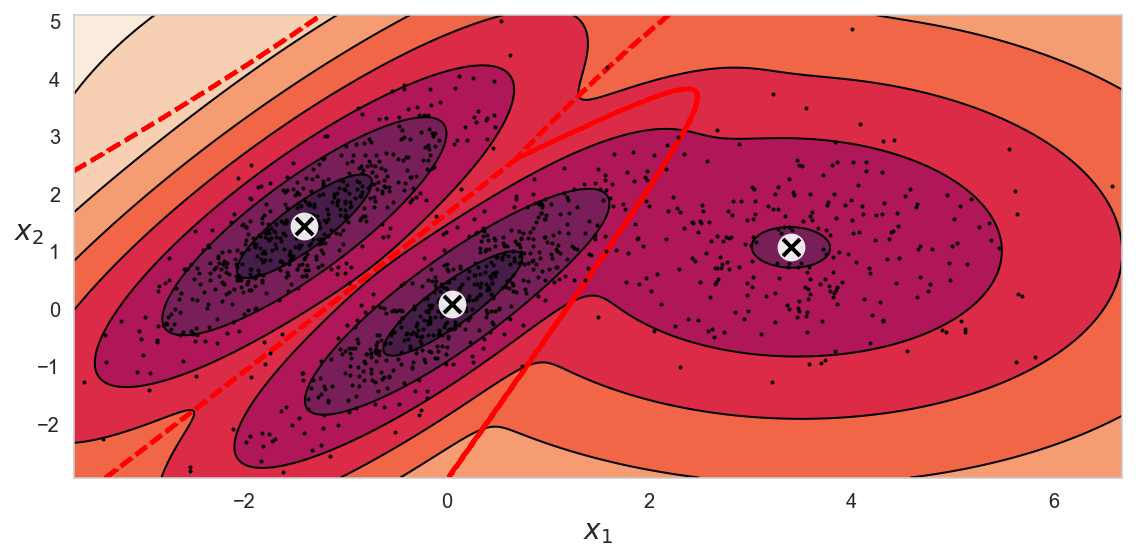

In [12]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

#save_fig("gaussian_mixtures_plot")
plt.tight_layout();

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"full"` (default): no constraint, each cluster can take on any ellipsoidal shape of any size.
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

In [13]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

GaussianMixture(covariance_type='tied', n_components=3, n_init=10,
                random_state=42)

GaussianMixture(covariance_type='spherical', n_components=3, n_init=10,
                random_state=42)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [14]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


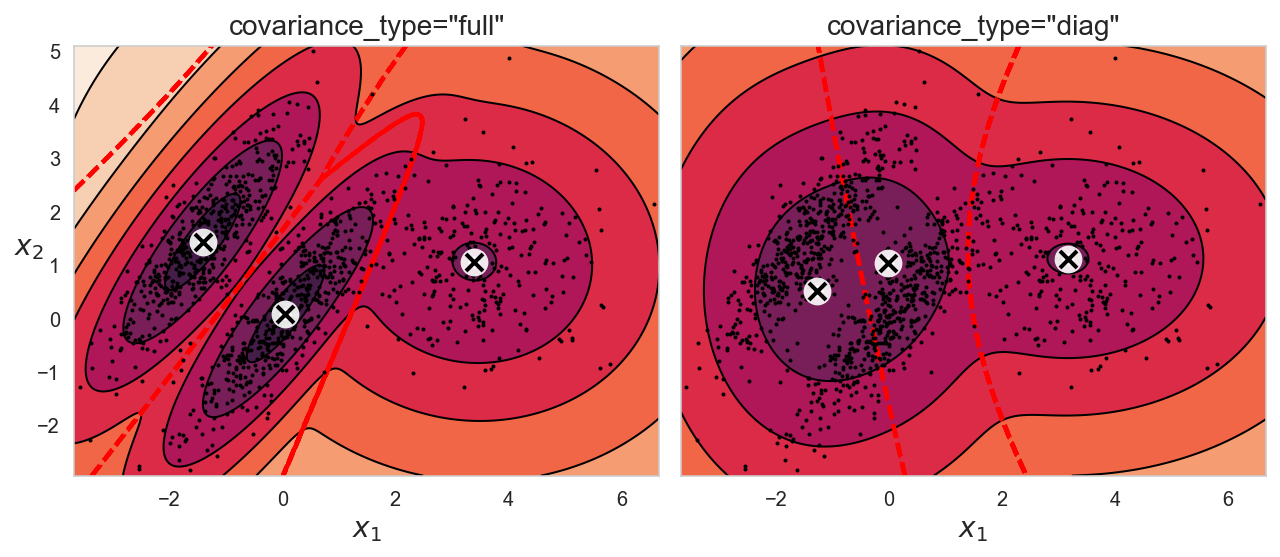

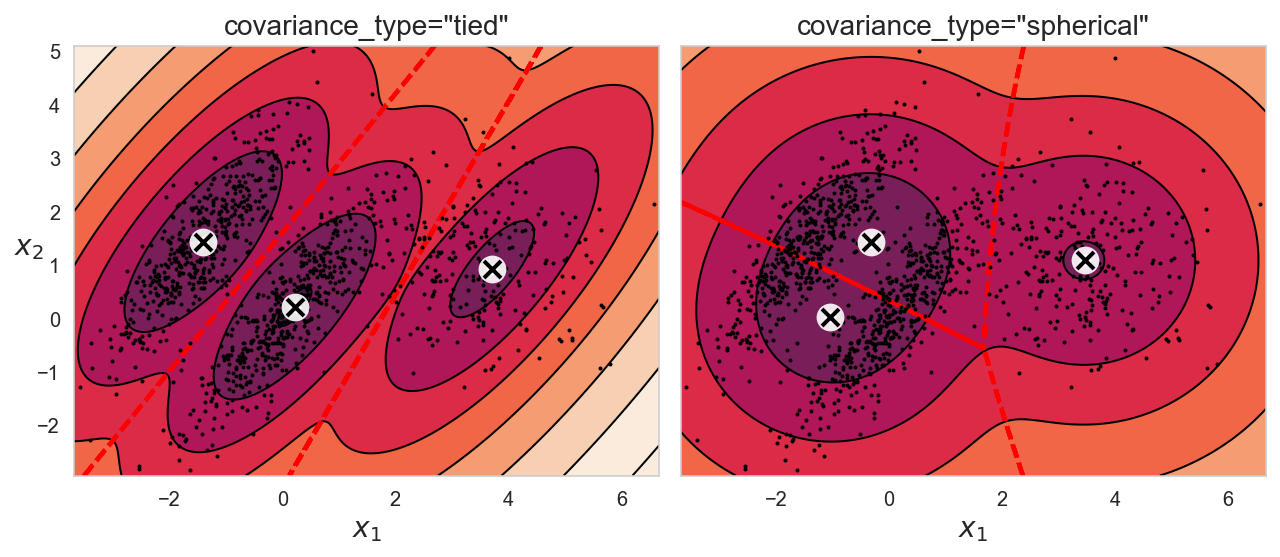

In [15]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout();

compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.tight_layout();
#save_fig("covariance_type_plot")

### Anomaly Detection using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [16]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

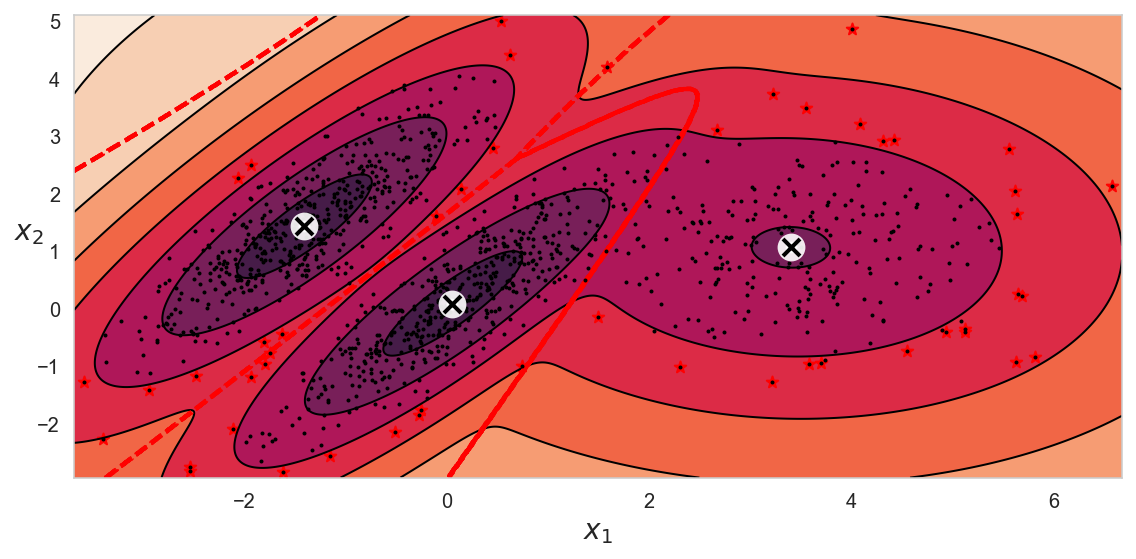

In [17]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

#save_fig("mixture_anomaly_detection_plot")
plt.tight_layout();

###  K-means vs. GMM

#### Generate data

In [18]:
from collections import OrderedDict
from time import time

from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)  

#### Fit K-means and GMM to data and compare 

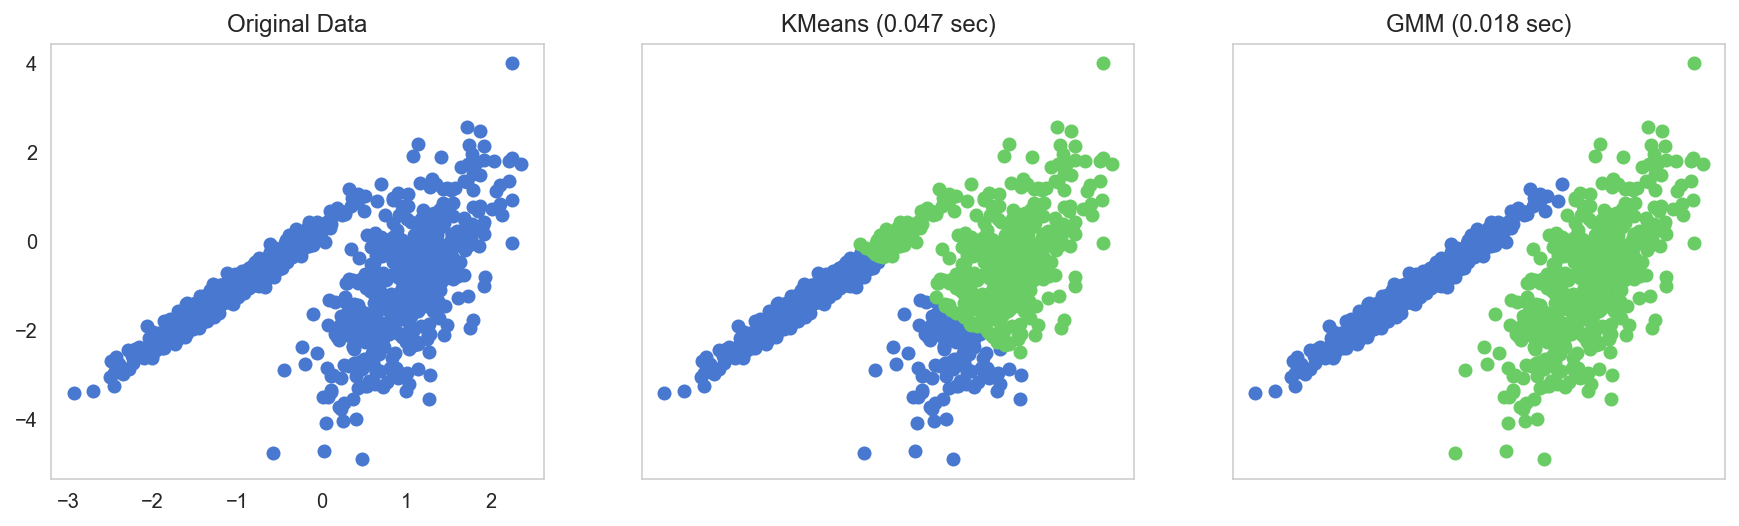

In [19]:
fig = plt.figure(figsize=(15,4))

ax = fig.add_subplot(131)
ax.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Spectral)
ax.set_title("Original Data")


methods = OrderedDict()
methods['KMeans'] = KMeans(n_clusters=2)
methods['GMM'] = GaussianMixture(n_components=2)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_predict(X)
    t1 = time()
    #print("{}: {:.2g} sec".format(label, t1 - t0))
    ax = fig.add_subplot(1, 3, 2 + i)
    
    clusters = np.unique(Y)
    for cluster in clusters:
      row_ix = np.where(Y == cluster)
      ax.scatter(X[row_ix, 0], X[row_ix, 1])
    
    # ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral,alpha=0.5)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show();

## Hierarchical clustering
https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318

### Import Mall Customer data

In [20]:
dataset=pd.read_excel('data/L12-clustering-adv.xlsx',sheet_name='MALLCUST')
X = dataset.iloc[:, [3,4]].values

### Create a dendogram

Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster. Below is the dendrogram diagram.

In [21]:
import scipy.cluster.hierarchy as sch

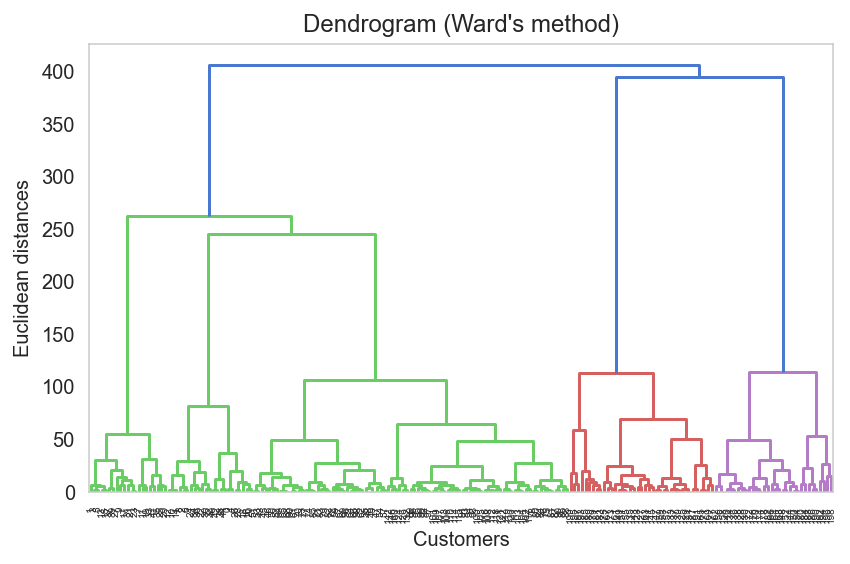

In [22]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram (Ward\'s method)')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.tight_layout();

The number of clusters can be determined by drawing a horizontal cut in the dendogram. 
The number of clusters will be the number of nodes below the cut. Two nodes below the cut with the same closest ancester should have low dissimiliarity and the merged node (above the cut) should have relatively high dissimilarity.


### Fit the model and make prediction

In [23]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(X)

### Visualize clustering

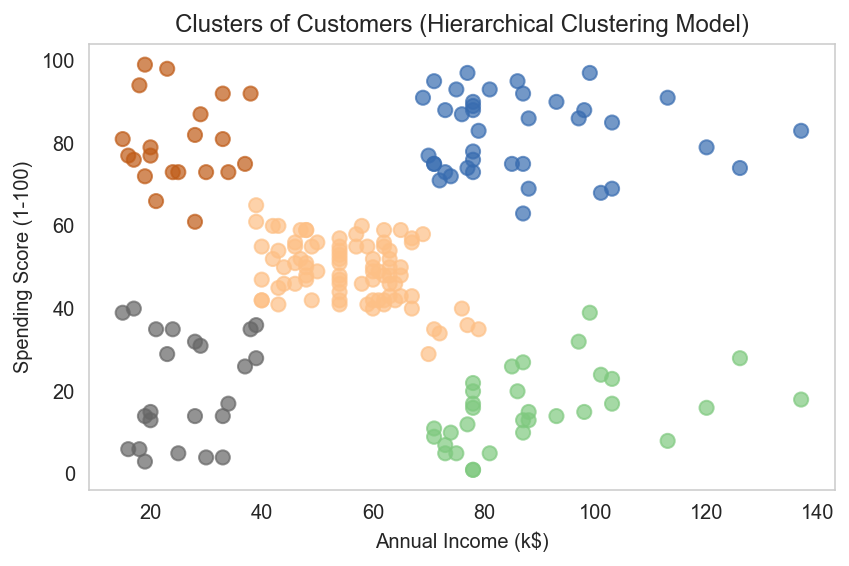

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='Accent', alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout();

From the results, we can name each cluster based on the Spending and Income.
- High income, Low spending = Careful
- Normnal income, Normal spending = Standard
- High income, High spending = Target
- Low income, High spending = Careless
- Low income, Low spending = Sensible